**Foremost**

**Credits - Kaiye/Xi/Lu's model is used as a basis for this**

**major difference between our approach is that we are going to see if it makes sense to use returns instead of prices, and abs. change in some other metrics**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing  
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime
from tqdm import tqdm
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys    

# import customized utils
# from '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/figsize.py' import * 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_to_module = '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/'
sys.path.append(path_to_module)


In [4]:
print(sys.path)
from figsize import * 

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/']


# kinda EDA but not really EDA

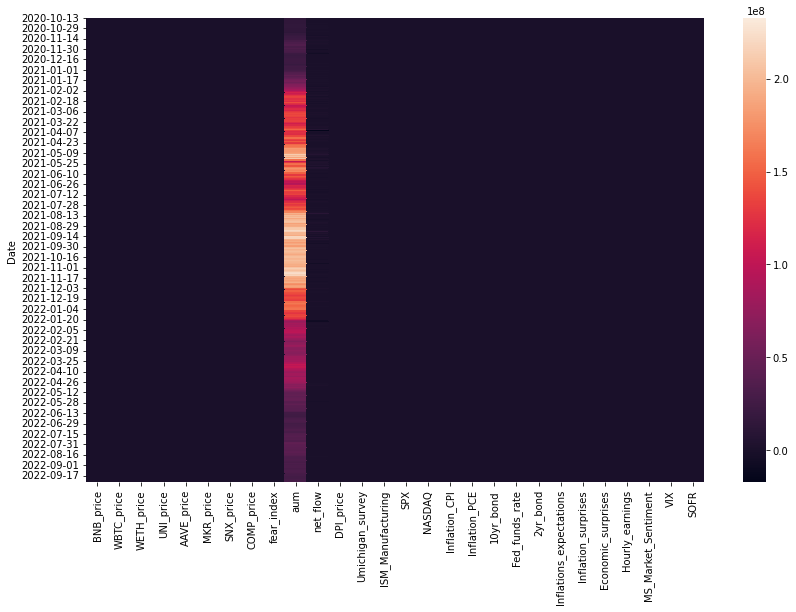

In [5]:

# read dataset 
# DPI_dataset = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final.csv', index_col='Date') 
DPI_dataset = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_222.csv', index_col='Date') 

# DPI_dataset = DPI_dataset.drop(columns='net_flow') 


# build a figure for EDA 
fig, ax = create_figure(1000)
sb.heatmap(DPI_dataset, ax=ax) 

In [6]:
DPI_dataset.shape

(715, 28)

In [7]:
DPI_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BNB_price,715.0,3.250084e+02,1.679395e+02,2.658913e+01,2.499752e+02,3.293675e+02,4.263119e+02,6.654986e+02
WBTC_price,715.0,3.819406e+04,1.386073e+04,1.134953e+04,2.447345e+04,3.902253e+04,4.809268e+04,6.760162e+04
WETH_price,715.0,2.315853e+03,1.109874e+03,3.677990e+02,1.555185e+03,2.228154e+03,3.133659e+03,4.786907e+03
UNI_price,715.0,1.567125e+01,1.020593e+01,2.022910e+00,6.325104e+00,1.439377e+01,2.447073e+01,4.348954e+01
AAVE_price,715.0,2.210192e+02,1.316536e+02,2.773033e+01,9.313982e+01,1.934258e+02,3.229736e+02,6.348663e+02
MKR_price,715.0,2.013230e+03,1.067834e+03,4.926945e+02,1.053290e+03,2.063765e+03,2.597884e+03,5.589366e+03
SNX_price,715.0,8.660951e+00,5.834031e+00,1.593611e+00,4.036014e+00,6.256118e+00,1.170687e+01,2.653768e+01
COMP_price,715.0,2.464497e+02,1.758724e+02,2.954849e+01,1.046396e+02,1.932239e+02,3.897840e+02,8.494576e+02
fear_index,715.0,-2.769231e-01,1.557115e+00,-2.000000e+00,-2.000000e+00,-1.000000e+00,1.000000e+00,2.000000e+00
aum,715.0,1.020028e+08,6.258467e+07,1.341308e+07,3.877785e+07,9.742407e+07,1.486210e+08,2.329499e+08


# Manual Feature Selection

In [8]:
def get_correlation_matrix(df, filepath):
  df_corr = df.corr()
  sb.set(rc={'figure.figsize': (30, 20)})
  sb.heatmap(df_corr, cmap="Blues", center=0, annot=True)
  plt.savefig(filepath)
  plt.show()
  #plt.close()
  return

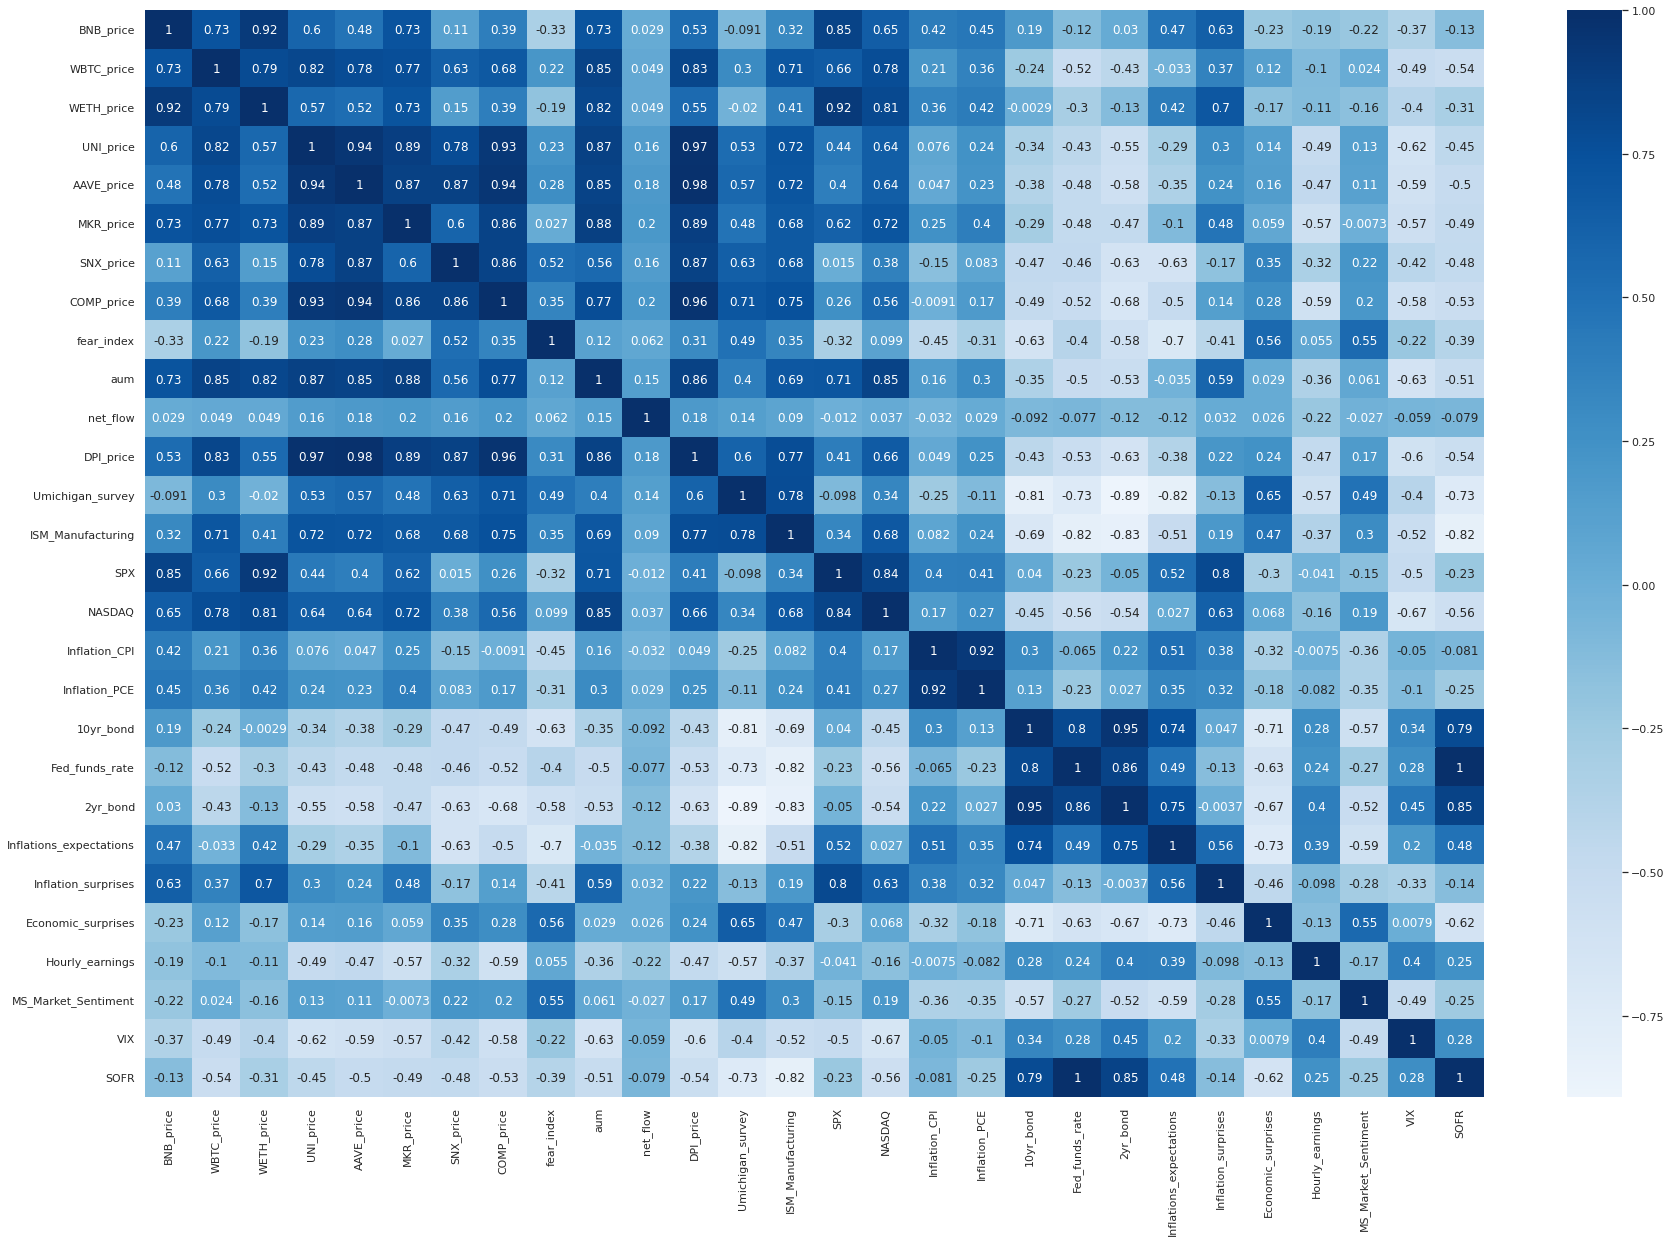

In [9]:
get_correlation_matrix(DPI_dataset,'/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_corr_2') 

DPI_corr = DPI_dataset.corr() 

In [10]:
order = DPI_corr.abs().unstack()
sorted = order.sort_values(ascending = False) 

sorted_2 = sorted.copy()
#display(sorted_2) 
# sorted_2 < 1.0 and sorted_2 > 0.75 
#type(sorted_2) 

In [11]:
sorted_3 = sorted_2.loc[lambda x: (x < 1.0) & (x > 0.80)]
sorted_3.drop_duplicates()



SOFR                     Fed_funds_rate       0.996604
DPI_price                AAVE_price           0.978413
                         UNI_price            0.974427
                         COMP_price           0.958061
2yr_bond                 10yr_bond            0.954388
COMP_price               AAVE_price           0.943239
UNI_price                AAVE_price           0.942885
COMP_price               UNI_price            0.930609
Inflation_CPI            Inflation_PCE        0.923562
WETH_price               BNB_price            0.916608
SPX                      WETH_price           0.916362
Umichigan_survey         2yr_bond             0.892287
DPI_price                MKR_price            0.888246
MKR_price                UNI_price            0.887279
aum                      MKR_price            0.878811
UNI_price                aum                  0.873863
SNX_price                AAVE_price           0.869922
MKR_price                AAVE_price           0.868093
SNX_price 

**Features to include:** mainly based on the correlation
- aum
- dex activities: token_a_amount
- prices: TRIBE_price, GMI_price, WETH_price
- macro: CPI CHNG Index, VIX Index, USGG10YR Index, NYCNM1IR Index, CSIIUSD Index, ECSURPUS Index, CONSSENT Index, NAPMPMI Index, AHE YOY% Index, MSXAMSIL Index, SPX Index, LIBOR

# Data Preprocessing

In [12]:
DPI_dataset.columns

Index(['BNB_price', 'WBTC_price', 'WETH_price', 'UNI_price', 'AAVE_price',
       'MKR_price', 'SNX_price', 'COMP_price', 'fear_index', 'aum', 'net_flow',
       'DPI_price', 'Umichigan_survey', 'ISM_Manufacturing', 'SPX', 'NASDAQ',
       'Inflation_CPI', 'Inflation_PCE', '10yr_bond', 'Fed_funds_rate',
       '2yr_bond', 'Inflations_expectations', 'Inflation_surprises',
       'Economic_surprises', 'Hourly_earnings', 'MS_Market_Sentiment', 'VIX',
       'SOFR'],
      dtype='object')

In [13]:
columns_to_drop = ['Fed_funds_rate', '2yr_bond', 'Inflation_PCE', 'BNB_price', 'NASDAQ', 'WBTC_price', 'ISM_Manufacturing',  'Umichigan_survey', 'Inflation_surprises' ,'fear_index'] 
### others to cosnider removing - 'Inflations_expectations', 

X = DPI_dataset.copy()
X.drop(columns='net_flow', inplace=True)
# X.drop(['BNB_returns', 'WBTC_returns', 'Inflation_PCE_change', '2yr_bond_change', 'NASDAQ_change'], axis = 1, inplace = True)
X.drop(columns_to_drop, axis = 1, inplace = True)
y = DPI_dataset['net_flow'].copy() 

In [14]:
# X
# y

In [15]:
### DO WE NEED TO SCALE? DOES IT MATTER WORKING WITH RETURNS/CHANGES DIRECTLY? 

X_scaled = pd.DataFrame(preprocessing.scale(X))
X_scaled.columns = X.columns
# X_scaled.rename(columns = {'CPI CHNG Index': 'CPI_CHNG_Index', 'VIX Index': 'VIX_Index', 'USGG10YR Index': 'USGG10YR_Index', 
#              'NYCNM1IR Index': 'NYCNM1IR_Index', 'CSIIUSD Index': 'CSIIUSD_Index', 
#              'ECSURPUS Index': 'ECSURPUS_Index', 'CONSSENT Index': 'CONSSENT_Index',
#              'NAPMPMI Index': 'NAPMPMI_Index', 'AHE YOY% Index': 'AHE_YOY_Index',
#              'MSXAMSIL Index': 'MSXAMSIL_Index', 'SPX Index': 'SPX_Index'}, inplace = True)

In [16]:
X_scaled.shape

(715, 17)

In [43]:
y=y.reset_index()
y= y.drop(columns= 'Date')
print(y)


          net_flow
0    314475.051903
1    729329.679212
2    861171.962951
3    344120.713620
4    -30418.516127
..             ...
710       0.000000
711       0.000000
712       0.000000
713 -238218.462173
714  -83821.615687

[715 rows x 1 columns]


In [17]:
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WETH_price,715.0,1.391272e-16,1.0007,-1.756431,-0.685844,-0.079072,0.737362,2.227986
UNI_price,715.0,0.000000e+00,1.0007,-1.338231,-0.916397,-0.125258,0.862796,2.727606
AAVE_price,715.0,-7.950129e-17,1.0007,-1.469191,-0.972013,-0.209738,0.774956,3.145655
MKR_price,715.0,-1.391272e-16,1.0007,-1.424940,-0.899589,0.047358,0.547897,3.351307
SNX_price,715.0,-1.590026e-16,1.0007,-1.212247,-0.793306,-0.412496,0.522461,3.066361
COMP_price,715.0,-1.987532e-16,1.0007,-1.234151,-0.806888,-0.302850,0.815562,3.431068
aum,715.0,1.590026e-16,1.0007,-1.416509,-1.010938,-0.073211,0.745404,2.093784
DPI_price,715.0,1.590026e-16,1.0007,-1.350291,-1.001731,-0.091156,0.769154,2.768659
SPX,715.0,1.391272e-15,1.0007,-2.590223,-0.758581,0.067853,0.799607,1.842080
Inflation_CPI,715.0,-9.937661e-17,1.0007,-1.551055,-0.698412,0.154231,0.722659,2.143731


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state = 10 )   ## test_size=0.20,

# Linear Regression

## Ordinary Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [46]:
ols_train = LinearRegression().fit(X_train, y_train)
y_train_predicted = ols_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ols_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test)) 

Training set R-squared is: 0.09468250912208176
Test set R-squared is: 0.061575134338617166


Linear Regression - statsmodel

In [49]:
import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
res = model.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:               net_flow   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              2.977
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                    6.31e-05
Time:                        01:25:13   Log-Likelihood:                         -7740.6
No. Observations:                 500   AIC:                                  1.552e+04
Df Residuals:                     483   BIC:                                  1.559e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Forward Model Selection: AIC

In [21]:
import statsmodels.formula.api as smf 

In [22]:
def forward_select(X, y):
  data = pd.concat([X, y], axis = 1)
  variate = set(X.columns)
  selected = []
  # set the scores to be infinite
  current_score, best_new_score = float('inf'), float('inf')
  # perform the forward selection
  while variate:
    aic_with_variate = []
    for candidate in variate:
      # set the regression model
      formula = "{}~{}".format(y.columns[0], "+".join(selected + [candidate]))
      aic = smf.ols(formula = formula, data = data).fit().aic
      aic_with_variate.append((aic,candidate))
    aic_with_variate.sort(reverse = True)
    best_new_score, best_candidate = aic_with_variate.pop()
    if current_score > best_new_score:
      variate.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
      print("AIC is {}, continuing!".format(current_score))
    else:
      print("Forward Selection Done")
      break
  # final regression model
  formula = "{}~{}".format(y.columns[0], "+".join(selected))
  print("Final Regression model is {}".format(formula))
  model = smf.ols(formula = formula, data = data).fit()
  return(model)

In [23]:
aic_train = forward_select(X_train, pd.DataFrame(y_train))

ValueError: ignored

In [ ]:
y_train_predicted4 = aic_train.predict(X_train)
rmse_train4 = r2_score(y_true = y_train, y_pred = y_train_predicted4)
y_test_predicted4 = aic_train.predict(X_test)
rmse_test4 = r2_score(y_true = y_test, y_pred = y_test_predicted4)
print("Training set R-squared is: {}".format(rmse_train4))
print("Test set R-squared is: {}".format(rmse_test4))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_train = Ridge(alpha = 1.0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

## LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_train = Lasso().fit(X_train, y_train)
y_train_predicted3 = lasso_train.predict(X_train)
rmse_train3 = r2_score(y_true = y_train, y_pred = y_train_predicted3)
y_test_predicted3 = lasso_train.predict(X_test)
rmse_test3 = r2_score(y_true = y_test, y_pred = y_test_predicted3)
print("Training set R-squared is: {}".format(rmse_train3))
print("Test set R-squared is: {}".format(rmse_test3))

#K Nearest Neighbours

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
KNN_train = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
y_train_predicted = KNN_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = KNN_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVM_train = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
y_train_predicted = SVM_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = SVM_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

# Ensemble Trees

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF_train = RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1, random_state=42).fit(X_train, y_train)
y_train_predicted = RF_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = RF_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ET_train = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = ET_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ET_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

# Boosting

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
AB_train = AdaBoostRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = AB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = AB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB_train = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_train_predicted = GB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = GB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

## XG Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB_train = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, random_state=42).fit(X_train, y_train)
y_train_predicted = XGB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = XGB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))